In [1]:
import pandas as pd
import numpy as np
from google.colab import files
up = files.upload()

Saving dataset.csv to dataset.csv


#In Unsupervised model, we consider all the features as single dataset.

In [3]:
df = pd.read_csv("dataset.csv")
income = df["INCOME"].values
spend = df["SPEND"].values
X = np.array(list(zip(income, spend)))

#We select select the number of clusters and calcualate the WCSS(Within cluster sum of square) distance.
#Select the model with less WCSS and less clusters number(K)

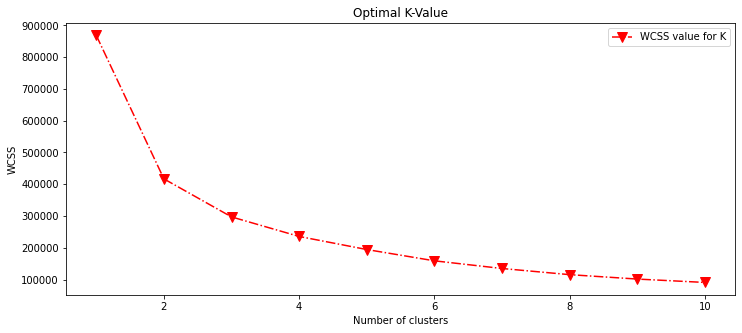

In [5]:
#WCSS --> inertia
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters=i, random_state=0)
  km.fit(X)
  wcss.append(km.inertia_)
plt.figure(figsize=(12,5))
plt.plot(range(1,11), wcss, "r-.v", ms=10, label="WCSS value for K")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Optimal K-Value")
plt.legend()
plt.show()

#We select the K values with minimum WCSS
We see the WCSS values is less for K=4

In [8]:
model = KMeans(n_clusters=4, random_state=0)
y_means = model.fit_predict(X)

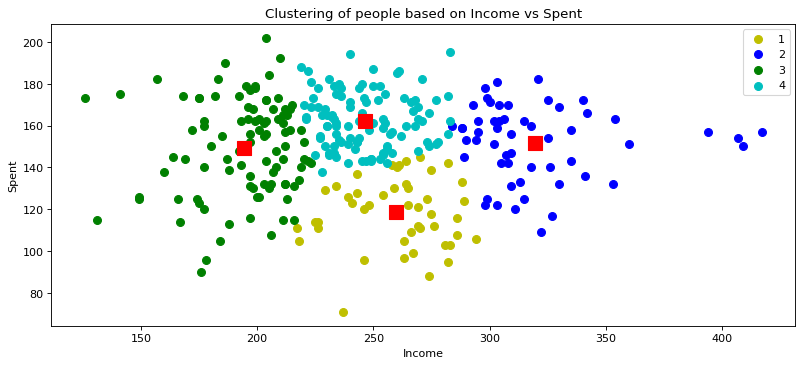

In [9]:
plt.figure(figsize=(12,5),dpi=80)
plt.scatter(X[y_means==0, 0], X[y_means==0, 1], s=50, color="y", label="1")
plt.scatter(X[y_means==1, 0], X[y_means==1, 1], s=50, color="b", label="2")
plt.scatter(X[y_means==2, 0], X[y_means==2, 1], s=50, color="g", label="3")
plt.scatter(X[y_means==3, 0], X[y_means==3, 1], s=50, color="c", label="4")
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c="r", s=150, marker="s")
plt.legend()
plt.xlabel("Income")
plt.ylabel("Spent")
plt.title("Clustering of people based on Income vs Spent")
plt.show()